In [1]:
import csv
import io
import urllib.request

from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

data = {}

for i in range(1, 73):
    print(i)
    url = f"http://demo.spraakdata.gu.se/lsi/clld/values.csv?parameter={i}"
    webpage = urllib.request.urlopen(url)
    reader = csv.reader(io.TextIOWrapper(webpage))
    for j, row in enumerate(reader):
        if j == 0: continue
        lang = ' '.join(row[7].split('-')[1:])
        val = row[4]
        if lang not in data: data[lang] = []
        data[lang].append(val)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72


In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [21]:
for j in range(72):
    for i in data:
        data[i][j] = int(data[i][j])

[5.09901951 3.60555128 5.38516481 ... 5.65685425 4.89897949 6.08276253]


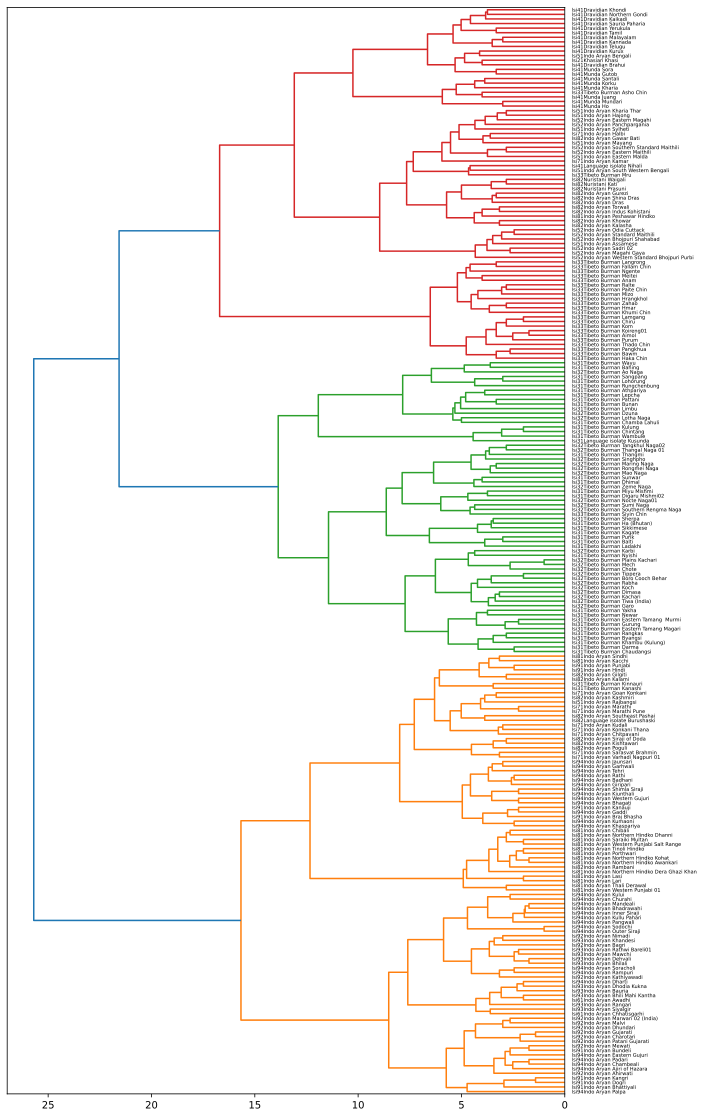

In [23]:
from scipy.spatial import distance
def compare(x, y):
    res = []
    for i in range(len(x)):
        if x[i] != y[i]: res.append(1)
        else: res.append(0)
    return distance.euclidean([0] * len(x), res)

y = pdist(list(data.values()), compare)
print(y)
Z = ward(y)
plt.figure(figsize=(10.0, 20.0))
hierarchy.dendrogram(Z, labels=list(data.keys()), orientation='left')
plt.show()

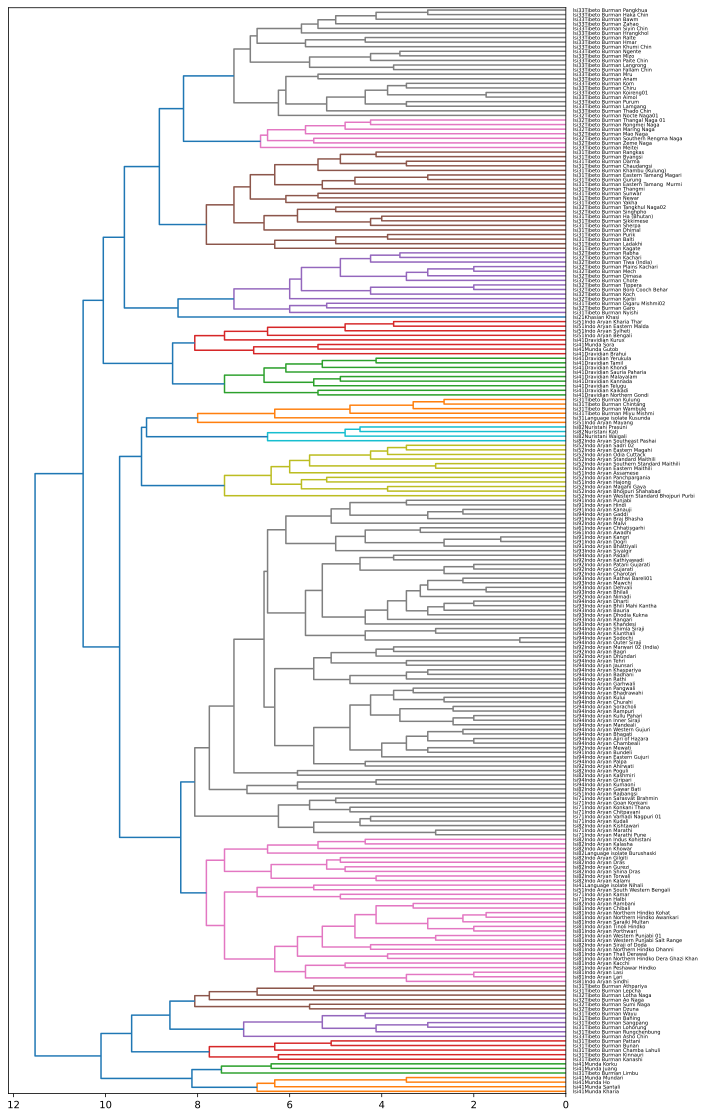

In [22]:
from scipy.cluster.hierarchy import complete
Z = complete(y)
plt.figure(figsize=(10.0, 20.0))
hierarchy.dendrogram(Z, labels=list(data.keys()), orientation='left')
plt.show()

In [12]:
print(len(set(data['lsi41Dravidian Kannada']).intersection(set(data['lsi41Dravidian Malayalam']))))

63


In [13]:
print(len(set(data['lsi41Dravidian Tamil']).intersection(set(data['lsi41Dravidian Malayalam']))))

62


In [16]:
print(len(set(data['lsi41Dravidian Tamil']).intersection(set(data['lsi41Dravidian Kannada']))))

57


In [19]:
for i in range(len(data['lsi41Dravidian Tamil'])):
    if data['lsi41Dravidian Kannada'][i] != data['lsi41Dravidian Malayalam'][i]:
        print(i + 1)

39
45
54
57
58
60
63
66
70


In [3]:
print()

56


In [29]:
a = []
for i in data:
    a.append([len(set(data['lsi52Indo Aryan Southern Standard Maithili']).intersection(set(data[i]))), i])
sorted(a)

[[25, 'lsi31Tibeto Burman Wambule'],
 [27, 'lsi31Language isolate Kusunda'],
 [28, 'lsi31Tibeto Burman Lohorung'],
 [28, 'lsi31Tibeto Burman Wayu'],
 [28, 'lsi32Tibeto Burman Lotha Naga'],
 [29, 'lsi31Tibeto Burman Chintang'],
 [29, 'lsi32Tibeto Burman Ao Naga'],
 [30, 'lsi31Tibeto Burman Kulung'],
 [31, 'lsi32Tibeto Burman Sumi Naga'],
 [32, 'lsi31Tibeto Burman Sangpang'],
 [33, 'lsi31Tibeto Burman Rungchenbung'],
 [34, 'lsi31Tibeto Burman Bahing'],
 [34, 'lsi31Tibeto Burman Dhimal'],
 [34, 'lsi31Tibeto Burman Sikkimese'],
 [35, 'lsi31Tibeto Burman Miyu Mishmi'],
 [35, 'lsi41Munda Kharia'],
 [36, 'lsi31Tibeto Burman Sherpa'],
 [36, 'lsi32Tibeto Burman Zeme Naga'],
 [36, 'lsi33Tibeto Burman Siyin Chin'],
 [36, 'lsi41Munda Ho'],
 [36, 'lsi41Munda Mundari'],
 [37, 'lsi31Tibeto Burman Chamba Lahuli'],
 [37, 'lsi31Tibeto Burman Ladakhi'],
 [38, 'lsi31Tibeto Burman Limbu'],
 [38, 'lsi31Tibeto Burman Sunwar'],
 [38, 'lsi32Tibeto Burman Dzuna'],
 [39, 'lsi31Tibeto Burman Digaru Mishmi02'],
 [

In [35]:
from gensim.corpora.dictionary import Dictionary
import gensim

data2 = []
for i in data:
    data2.append([str(x) for x in data[i]])

common_dictionary = Dictionary(data2)
common_corpus = [common_dictionary.doc2bow(text) for text in data2]
lda = gensim.models.LdaModel(common_corpus, num_topics=3)
lda.show_topics(num_topics=3, num_words=10, log=False, formatted=True)

[(0,
  '0.016*"66" + 0.015*"45" + 0.015*"52" + 0.015*"53" + 0.015*"41" + 0.015*"42" + 0.014*"27" + 0.014*"74" + 0.014*"9" + 0.014*"10"'),
 (1,
  '0.017*"9" + 0.015*"19" + 0.015*"10" + 0.014*"71" + 0.014*"94" + 0.013*"16" + 0.013*"11" + 0.013*"7" + 0.013*"70" + 0.012*"41"'),
 (2,
  '0.015*"47" + 0.015*"44" + 0.014*"49" + 0.014*"31" + 0.014*"30" + 0.014*"7" + 0.014*"46" + 0.013*"6" + 0.013*"54" + 0.013*"45"')]

In [42]:
from numpy import argmax
b = []
for ct, i in enumerate(common_corpus):
    a = dict(lda[i])
    b.append((0 if 0 not in a else a[0], list(data.keys())[ct]))
sorted(b)

[(0, 'lsi21Khasian Khasi'),
 (0, 'lsi31Language isolate Kusunda'),
 (0, 'lsi31Tibeto Burman Chintang'),
 (0, 'lsi31Tibeto Burman Kulung'),
 (0, 'lsi31Tibeto Burman Wambule'),
 (0, 'lsi33Tibeto Burman Chiru'),
 (0, 'lsi33Tibeto Burman Fallam Chin'),
 (0, 'lsi33Tibeto Burman Haka Chin'),
 (0, 'lsi33Tibeto Burman Langrong'),
 (0, 'lsi33Tibeto Burman Mizo'),
 (0, 'lsi33Tibeto Burman Paite Chin'),
 (0, 'lsi33Tibeto Burman Zahao'),
 (0, 'lsi41Dravidian Brahui'),
 (0, 'lsi41Dravidian Kaikadi'),
 (0, 'lsi41Dravidian Kannada'),
 (0, 'lsi41Dravidian Khondi'),
 (0, 'lsi41Dravidian Kurux'),
 (0, 'lsi41Dravidian Malayalam'),
 (0, 'lsi41Dravidian Northern Gondi'),
 (0, 'lsi41Dravidian Sauria Paharia'),
 (0, 'lsi41Dravidian Tamil'),
 (0, 'lsi41Dravidian Telugu'),
 (0, 'lsi41Munda Gutob'),
 (0, 'lsi41Munda Sora'),
 (0, 'lsi51Indo Aryan Assamese'),
 (0, 'lsi51Indo Aryan Bengali'),
 (0, 'lsi51Indo Aryan Eastern Malda'),
 (0, 'lsi51Indo Aryan Hajong'),
 (0, 'lsi51Indo Aryan Kharia Thar'),
 (0, 'lsi51Indo